In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
titanic_data = pd.read_csv('train.csv')

In [3]:
titanic_data.info() #We miss age, lots of Cabin, 2 Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

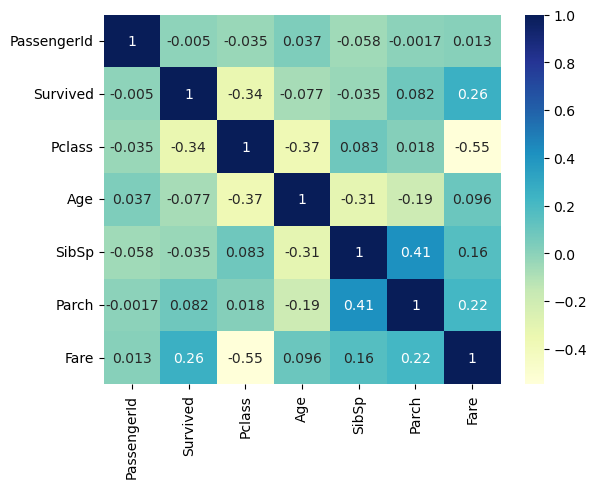

In [6]:
#Find correlation to survival
import seaborn as sns

sns.heatmap(titanic_data.corr(numeric_only = True),annot = True, cmap="YlGnBu")
#Fare, pclass has stronger correlation with survival

In [7]:
#Split training data into 80-20
from sklearn.model_selection import StratifiedShuffleSplit
split_m = StratifiedShuffleSplit(n_splits = 1, test_size=0.2) 
#split is an object of StratifiedShuffleSplit, it stores the rule telling how we are splitting the data
#In this case, we are spliting one time(n_splits=1) using 20% of the titanic_data as testing data.
for train_indices, test_indices in split_m.split(titanic_data, titanic_data[
                                               ["Survived","Pclass", "Sex"]]):
#The .split(X,y) is a Generator where it looks at y to make sure we have balanced portion of ["Survived","Pclass", "Sex"]
#And randomly split the whole dataset based on the split_m
#In this case, it will output an array of training idx and that of testing idx, we use for loop to capture that.
#.split returns a generator, which yields tuples of NumPy arrays
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

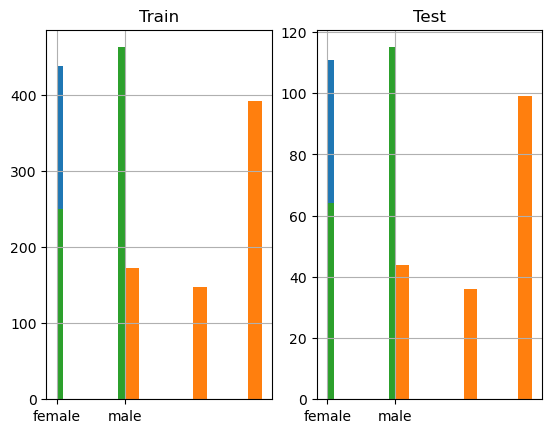

In [8]:
#plt.subplot(nrow, ncol, index)
"""
Eg.
Input
plt.subplot(2, 3, 1)  # row 1, col 1
plt.subplot(2, 3, 2)  # row 1, col 2
plt.subplot(2, 3, 3)  # row 1, col 3
plt.subplot(2, 3, 4)  # row 2, col 1
plt.subplot(2, 3, 5)  # row 2, col 2
plt.subplot(2, 3, 6)  # row 2, col 3

Output
+----+----+----+
| 1  | 2  | 3  |
+----+----+----+
| 4  | 5  | 6  |
+----+----+----+
"""
plt.subplot(1,2,1)
strat_train_set['Survived'].hist() #Blue
strat_train_set['Pclass'].hist() #Orange
strat_train_set['Sex'].hist()
plt.title("Train")

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()
strat_test_set['Sex'].hist()
plt.title("Test")

plt.show()
#By the visualizations, we can see that both Training_split and Testing_split have equal ratio of Survived and Pclass


In [9]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 199 to 849
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          571 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        164 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [10]:
from sklearn.base import BaseEstimator, TransformerMixin #Used to chain the whole things into a pipeline
#BaseEstimator: Used to define the object, TransformerMixin: Gives fit_transform() method 
from sklearn.impute import SimpleImputer #We wanna fillin the missing values

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        imputer = SimpleImputer(strategy = "mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [15]:
#Modify the category column, Embark
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()

        column_names = ["C", "S", "Q", "N"]

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        
        column_names = ["Female", "Male"]

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        return X

In [19]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(['Embarked', 'Name', 'Ticket', 'Cabin', 'Sex', 'N'], axis=1, errors='ignore')

In [20]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()),
                    ("featureencoder", FeatureEncoder()),
                     ("featuredropper", FeatureDropper())])

In [21]:
strat_train_set = pipeline.fit_transform(strat_train_set)
#Learn class method for Python, Sklearn

In [28]:
#Scaling
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [43]:
#Use random_forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV #Find hyperparameter through cross validation with different combination

clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [ 110, 120, 130, 140, 150], "max_depth": [10, 13, 15], "min_samples_split": [2,3,4]}
]
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', return_train_score=True)

grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 13, 15],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [110, 120, 130, 140, 150]}],
             return_train_score=True, scoring='accuracy')

In [44]:
final_clf = grid_search.best_estimator_

In [45]:
final_clf

RandomForestClassifier(max_depth=10, n_estimators=150)

In [38]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [46]:
X_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [47]:
final_clf.score(X_data_test, y_data_test) #Pretty nice accuracy

0.8268156424581006

In [50]:
#Now run it on the real training data
final_data = pipeline.fit_transform(titanic_data)

In [51]:
X_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV #Find hyperparameter through cross validation with different combination

prod_clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [100, 250, 300, 325, 350], "max_depth": [14, 15, 16, 17], "min_samples_split": [2, 3, 4, 5]}
]
grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring='accuracy', return_train_score=True)

grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [14, 15, 16, 17],
                          'min_samples_split': [2, 3, 4, 5],
                          'n_estimators': [100, 250, 300, 325, 350]}],
             return_train_score=True, scoring='accuracy')

In [87]:
prod_final_clf = grid_search.best_estimator_

In [88]:
prod_final_clf

RandomForestClassifier(max_depth=17, n_estimators=250)

In [89]:
prod_final_clf.score(X_data_final, y_data_final) 
# max_depth=17, n_estimators=250
# 1.0

1.0

In [90]:
titanic_test_data = pd.read_csv("test.csv")

In [91]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [96]:
X_final_test = final_test_data
X_final_test = X_final_test.ffill()

scalar = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [98]:
prediction = prod_final_clf.predict(X_data_final_test)

In [101]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = prediction

In [102]:
final_df.to_csv("prediction.csv", index=False)